# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [33]:
ds = pd.read_csv('PS_20174392719_1491204439457_log.csv')

1,PAYMENT,1060.31,C429214117,1089.0,28.69,M1591654462,0.0,0.0,0,0

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [34]:
def explore_data(df):
    # this function applies many exploratory techniques to a given dataframe
    display("Head", 
            df.head()
            .style
            .background_gradient(cmap='Blues')
           ) 
    display("Data Types",
            df.dtypes
            .to_frame()
           ) 
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column", 
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics", 
            df.describe()
           )
    display("Correlation Matrix", 
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )

In [35]:
explore_data(ds)

'Head'

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136,160296,M1979787155,0,0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249,19384.7,M2044282225,0,0,0,0
2,1,TRANSFER,181,C1305486145,181,0,C553264065,0,0,1,0
3,1,CASH_OUT,181,C840083671,181,0,C38997010,21182,0,1,0
4,1,PAYMENT,11668.1,C2048537720,41554,29885.9,M1230701703,0,0,0,0


'Data Types'

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,int64


'Data Types Count'

,0
float64,5
int64,3
object,3


'Nan Values per Column'

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


'Descriptive Statistics'

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


'Correlation Matrix'

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1,0.022,-0.01,-0.01,0.028,0.026,0.032,0.0033
amount,0.022,1,-0.0028,-0.0079,0.29,0.46,0.077,0.012
oldbalanceOrg,-0.01,-0.0028,1,1,0.066,0.042,0.01,0.0038
newbalanceOrig,-0.01,-0.0079,1,1,0.068,0.042,-0.0081,0.0038
oldbalanceDest,0.028,0.29,0.066,0.068,1,0.98,-0.0059,-0.00051
newbalanceDest,0.026,0.46,0.042,0.042,0.98,1,0.00054,-0.00053
isFraud,0.032,0.077,0.01,-0.0081,-0.0059,0.00054,1,0.044
isFlaggedFraud,0.0033,0.012,0.0038,0.0038,-0.00051,-0.00053,0.044,1


### What is the distribution of the outcome? 

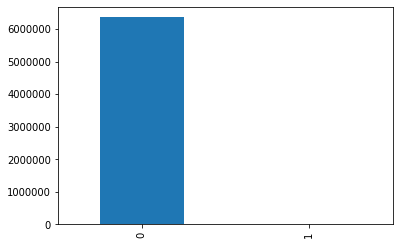

In [36]:
display(ds['isFlaggedFraud'].value_counts().plot.bar())

In [37]:
ds.groupby(by=['isFlaggedFraud']).mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,
0,243.396506,1.798501e+05,8.338655e+05,8.550962e+05,1.100704e+06,1.224999e+06,0.001288
1,537.562500,4.861598e+06,7.817869e+06,7.817869e+06,0.000000e+00,0.000000e+00,1.000000


In [48]:
ds['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [39]:
ds = ds.drop(['nameDest','nameOrig','type'],axis=1)

In [40]:
ds.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [41]:
X = ds.drop('isFlaggedFraud', axis=1).values 
y = ds['isFlaggedFraud'].values

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [42]:
# it's a strange metric, because we might want to explore adjacent events e.g. if a cashout immediately follows a transfer.

### Run a logistic regression classifier and evaluate its accuracy.

In [43]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state = 29)

In [44]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr.score(X_test, y_test)

-0.0002488268711626773

### Now pick a model of your choice and evaluate its accuracy.

In [45]:
from sklearn.model_selection import cross_val_score 
cv_results = cross_val_score(lr, X, y, cv=5) 
cv_results

array([0.        , 0.        , 0.0029294 , 0.        , 0.00149515])

In [46]:
ls = linear_model.Lasso(alpha=0.1)
ls.fit(X_train, y_train)
ls.score(X_test, y_test)

C:\Users\lukes\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5375259041029672, tolerance: 0.0012999962055189236
  positive)


-0.0006187610048353775

### Which model worked better and how do you know?

In [47]:
# 